# Initial Data Cleaning: Spotify Dataset

## Introduction

In this initial phase of our sentiment analysis of Grammy-winning songs, we will focus on cleaning and exploring the Spotify dataset. The goal is to ensure data quality for accurate and meaningful analysis.

## Data Exploration and Cleaning

### 1. Data Distribution and Quality

* **Analysis of Data Distribution**:
    * Examine the distribution of key variables such as popularity, danceability, energy, etc.
    * Identify potential biases or patterns in the data.
* **Evaluation of Data Quality**:
    * Look for missing values and decide how to handle them (imputation, deletion, etc.).
    * Identify and correct inconsistencies in the data (formats, units, etc.).
    * Detect and analyze outliers that may affect the analysis.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
df = pd.read_csv("/home/user/dsaspotify/data/spotify_dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
df.shape
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


we wanna see the songs with nulls 

In [6]:
df_nulos = df[df.isnull().any(axis=1)]
print(df_nulos)

       Unnamed: 0                track_id artists album_name track_name  \
65900       65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

       popularity  duration_ms  explicit  danceability  energy  ...  loudness  \
65900           0            0     False         0.501   0.583  ...     -9.46   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
65900     0       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature  track_genre  
65900  138.391               4        k-pop  

[1 rows x 21 columns]


In [7]:
df.dropna()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [8]:
df.shape


(114000, 21)

In [9]:
duplicates = df[df.duplicated(subset=['track_id'], keep=False)]
duplicates = duplicates.sort_values(by='track_id')
display(duplicates)
df = df.drop_duplicates(subset=['track_id'], keep='first')

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15028,15028,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,...,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,chill
103211,103211,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,...,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,soul
85578,85578,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,...,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,punk-rock
100420,100420,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,...,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,ska
91801,91801,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,...,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,4,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72679,72679,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,...,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,metalcore
22326,22326,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,...,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,death-metal
2004,2004,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,...,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alt-rock
3100,3100,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,...,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alternative


In [10]:
df.shape

(89741, 21)

### Identification of Data Anomaly

During the preliminary data cleaning phase of the Spotify dataset, it was observed that a significant proportion, specifically 14.03%, of the entries exhibited a popularity metric below zero. This finding is anomalous, as the Spotify popularity index is conventionally understood to range from 0 to 100.

### Rationale for Data Segregation

Given the substantial volume of these below-threshold entries, their wholesale removal from the primary dataset would result in a potentially significant loss of data integrity and may introduce unintended bias into the subsequent analysis. Therefore, a decision has been made to segregate these entries into a distinct dataset.

### Strategy for Insight Extraction

The segregated dataset will be subjected to a dedicated analysis to discern any relevant insights or patterns that may elucidate the nature of these below-threshold popularity values. This analysis will include:

* **Comparative Analysis:** A comparative study between the segregated dataset and the primary dataset to identify any systematic differences in other relevant attributes.
* **External Validation:** An investigation into the methodology employed by the Spotify API in calculating and reporting popularity metrics, with a focus on identifying any known edge cases or anomalies.
* **Contextual Research:** Examination of potential contextual factors, such as the age of the songs, genre-specific trends, or regional variances, that may contribute to the observed popularity values.


In [11]:
dfout = df[(df['popularity'] <= 0)]
dfout.head

<bound method NDFrame.head of         Unnamed: 0                track_id                            artists  \
23              23  0BUuuEvNa5T4lMaewyiudB                         Jason Mraz   
24              24  3Hn3LfhrQOaKihdCibJsTs                         Jason Mraz   
26              26  5IfCZDRXZrqZSm8AwE44PG                         Jason Mraz   
27              27  0dzKBptH2P5j5a0MifBMwM                         Jason Mraz   
28              28  5QAMZTM5cmLg3fHX9ZbTZi                         Jason Mraz   
...            ...                     ...                                ...   
112900      112900  29ajTypGTz6gP9cP0FLadM           TNK;Jay Jones;Gundy;Wahu   
113033      113033  0zpNYm246lwLt7HO6Lwcb1  Michael W. Smith;Carrie Underwood   
113047      113047  18FIFh4AGPC2zDLLFkJp4j                   Kim Walker-Smith   
113048      113048  6xw4sP2mGqAtVYZkBojxcI                   Kim Walker-Smith   
113099      113099  4pG38RfddM4XtRAjwBOmsF              Bryan & Katie Torwalt  

In [12]:
df = df.drop(df[df['popularity'] <= 0].index)
df.shape

(80293, 21)

### Loudness Analysis  
We will analyze the **loudness** (measured in dB) to explore its distribution, trends, and correlation with other audio features.  


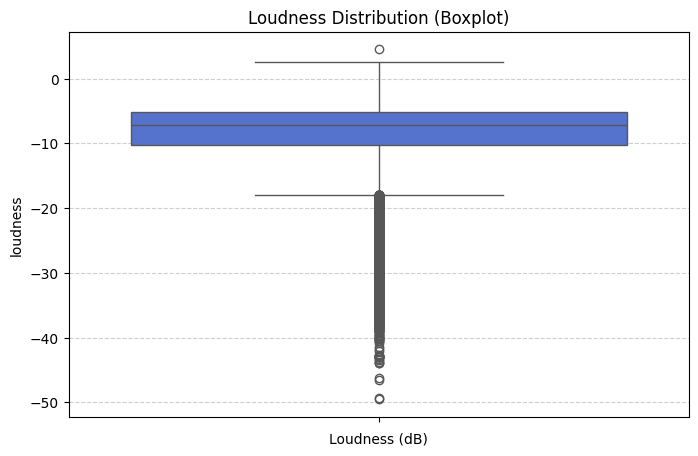

In [13]:
percentiles = df["loudness"].quantile([0.01, 0.05, 0.10, 0.25, 0.50])
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["loudness"], color="royalblue")
plt.xlabel("Loudness (dB)")
plt.title("Loudness Distribution (Boxplot)")
plt.grid(axis="y", linestyle="--", alpha=0.6)

In [14]:
out_of_range = df[(df["loudness"] < -60) | (df["loudness"] > 0)]
print(f"Valores fuera de rango: {len(out_of_range)}")
out_of_range.shape



Valores fuera de rango: 61


(61, 21)

#### Why is the range `(-∞, -60) ∪ (0, ∞)` impossible?

Loudness in the dataset is measured in **decibels (dB)**, and values outside the range **[-60, 0] dB** are unrealistic:

1. 0 dB is the maximum loudness in digital audio normalization. Any value above 0 dB would indicate clipping or an error in the data.
2. Values below -60 dB are near silence, as this is the approximate threshold of human hearing.
3. Most commercial music falls between 40 dB and -5 dB, making extreme values highly unlikely.

Thus, **data points outside this range are either incorrect. Delete it...**.


In [15]:
df = df[(df["loudness"] >= -60) & (df["loudness"] <= 0)]
df.shape

(80232, 21)

#### Converting Track Duration from Milliseconds to Minutes

In this step, we convert the track duration from milliseconds to minutes for better readability and analysis. Since 1 minute equals 60,000 milliseconds, we divide the duration_ms values by 60,000. Additionally, we remove the original duration_ms column to keep the dataset clean.


In [16]:
df["duration_min"] = df["duration_ms"] / 60000  
df.drop(columns=["duration_ms"], inplace=True)
df.head() 

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217


In [17]:
invalid_durations = df[df["duration_min"] <= 0]
display(invalid_durations)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min


#### Encoding Some Categorical Variables  

To make categorical variables more suitable, we transformed them into numerical values:  **`explicit` and `mode`**: These were already binary (True/False), so we converted them into integers (`0` and `1`).  



In [18]:
df["explicit"] = df["explicit"].astype(int)
df["mode"] = df["mode"].astype(int)

#### Unique Values

In [19]:
categorical_vars = ["artists", "album_name", "track_name", "explicit", "key", "mode", "time_signature", "track_genre"]
unique_counts = {col: df[col].nunique() for col in categorical_vars}
print("Valores únicos por categoría:")

for col, count in unique_counts.items():
    print(f"{col}: {count}")

for col in categorical_vars:
    print(f"\nValores más frecuentes en {col}:")
    print(df[col].value_counts().head())



Valores únicos por categoría:
artists: 29785
album_name: 45659
track_name: 69517
explicit: 2
key: 12
mode: 2
time_signature: 5
track_genre: 113

Valores más frecuentes en artists:
artists
George Jones         260
my little airport    171
The Beatles          149
BTS                  143
Håkan Hellström      139
Name: count, dtype: int64

Valores más frecuentes en album_name:
album_name
The Complete Hank Williams     110
Greatest Hits                   77
Mozart: A Night of Classics     75
Hans Zimmer: Epic Scores        68
Mozart - All Day Classics       68
Name: count, dtype: int64

Valores más frecuentes en track_name:
track_name
Home           24
Alone          22
Paradise       21
Monster        20
Without You    19
Name: count, dtype: int64

Valores más frecuentes en explicit:
explicit
0    73313
1     6919
Name: count, dtype: int64

Valores más frecuentes en key:
key
7    9494
0    9134
2    8467
9    8059
1    7657
Name: count, dtype: int64

Valores más frecuentes en mode:
mode


In [20]:
print(df["key"].isna().sum())  # Número de NaN en la columna 'key'
print(df["mode"].isna().sum())  # Número de NaN en la columna 'mode'
df.head()


0
0


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,0,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,0,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,0,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,0,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217


In [21]:
genre_mapping = {
    "Pop & Commercial": ["pop", "synth-pop", "electro", "pop-film", "dance", "edm", "party", "latino", "j-pop", "cantopop", "mandopop", "swedish"],
    "Rock & Alternative": ["rock", "alt-rock", "hard-rock", "punk-rock", "indie", "grunge", "metal", "hardcore", "power-pop", "singer-songwriter", "rock-n-roll", "psych-rock", "indie-pop"],
    "Metal & Heavy": ["heavy-metal", "death-metal", "black-metal", "grindcore", "metalcore"],
    "Hip-Hop & Urban": ["hip-hop", "rap", "r-n-b", "reggaeton", "afrobeat", "funk"],
    "Electronic & Dance": ["techno", "house", "deep-house", "chicago-house", "trance", "progressive-house", "minimal-techno", "drum-and-bass", "dubstep", "detroit-techno", "breakbeat"],
    "Jazz & Blues": ["jazz", "blues", "soul", "groove"],
    "Classical & Instrumental": ["classical", "opera", "piano", "new-age", "study", "ambient", "sleep"],
    "Latin & Tropical": ["salsa", "samba", "pagode", "forro", "brazil", "mpb"],
    "World Music & Traditional": ["indian", "turkish", "german", "british", "french", "spanish", "iranian", "malay", "brazil"],
    "Soundtrack & Experimental": ["soundtrack", "movie", "show-tunes", "romance", "gothic", "world-music", "idm", "experimental","acoustic"]
}

def categorize_genre(genre):
    for category, genres in genre_mapping.items():
        if genre in genres:
            return category
    return "Otro"

df["genre_category"] = df["track_genre"].apply(categorize_genre)

df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,genre_category
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,0,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433,Soundtrack & Experimental
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,0,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500,Soundtrack & Experimental
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,0,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767,Soundtrack & Experimental
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550,Soundtrack & Experimental
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,0,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217,Soundtrack & Experimental


In [22]:
df.head(150)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,genre_category
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,0,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,3.844433,Soundtrack & Experimental
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,0,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,2.493500,Soundtrack & Experimental
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,0,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,3.513767,Soundtrack & Experimental
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,3.365550,Soundtrack & Experimental
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,0,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,3.314217,Soundtrack & Experimental
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,188,2Dzhwe90lhHXVU6lk7Nx0H,Jon Bryant,Cult Classic,At Home,55,0,0.378,0.5200,11,...,0.0382,0.7770,0.088800,0.0979,0.3570,73.744,4,acoustic,3.777333,Soundtrack & Experimental
189,189,12niARgkwxGsklcEwh6GlG,Donovan Woods,"Hard Settle, Ain't Troubled","Portland, Maine",66,0,0.606,0.3490,4,...,0.0319,0.7640,0.306000,0.1120,0.1560,80.071,4,acoustic,3.397817,Soundtrack & Experimental
190,190,0v0pc1lIt5p6EBX7pnfOGF,Ross Copperman,Holding On and Letting Go LP,Holding On and Letting Go,49,0,0.486,0.5550,2,...,0.0271,0.8180,0.002690,0.1090,0.0992,77.987,4,acoustic,5.290683,Soundtrack & Experimental
191,191,5wQci5VCUjdbKnRD61XYwu,Joshua Hyslop,In Deepest Blue (Bonus Track Version),The Flood,60,0,0.577,0.4460,6,...,0.0313,0.5540,0.078200,0.1160,0.2620,81.005,4,acoustic,4.360667,Soundtrack & Experimental


##### Transforming `key` and `mode`

The key column (0–11) represents chromatic scale notes:

| Numeric Value | Note |
|--------------|------|
| 0            | C    |
| 1            | C#   |
| 2            | D    |
| ...          | ...  |
| 11           | B    |

 Normalizing `mode`
- `0` → Minor  
- `1` → Major  

In [23]:
df['key'].head()
df['key'].nunique()
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,genre_category
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,0,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433,Soundtrack & Experimental
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,0,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500,Soundtrack & Experimental
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,0,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767,Soundtrack & Experimental
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550,Soundtrack & Experimental
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,0,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217,Soundtrack & Experimental


In [24]:
key_mapping = {
    0: "C", 1: "C#", 2: "D", 3: "D#", 4: "E", 5: "F", 6: "F#", 7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B"
}
df["key"] = df["key"].map(key_mapping)


In [25]:
df['energy_level'] = pd.cut(
    df['energy'], 
    bins=[0, 0.33, 0.66, 1], 
    labels=['Low', 'Medium', 'High']
)

print(df['energy_level'].value_counts())

energy_level
High      42506
Medium    26437
Low       11288
Name: count, dtype: int64


# Commencement of Visual Analysis Phase

## Transition to Visualization for Data Interpretation

Following the completion of the preliminary data cleaning and exploratory analysis, the project will now transition to the visual analysis phase. This phase is crucial for gaining deeper insights into the dataset's characteristics and patterns.

## Objectives of Visualization

The primary objectives of this phase include:

* **Identification of Data Distributions:** To visually represent the distribution of key variables, enabling the identification of underlying patterns and potential anomalies.
* **Correlation Analysis:** To explore the relationships between variables, thereby uncovering potential correlations that may influence the analysis.
* **Outlier Detection:** To identify and analyze any outliers that may skew the data and require further investigation.
* **Pattern Recognition:** To recognize any patterns that may be apparent within the data.


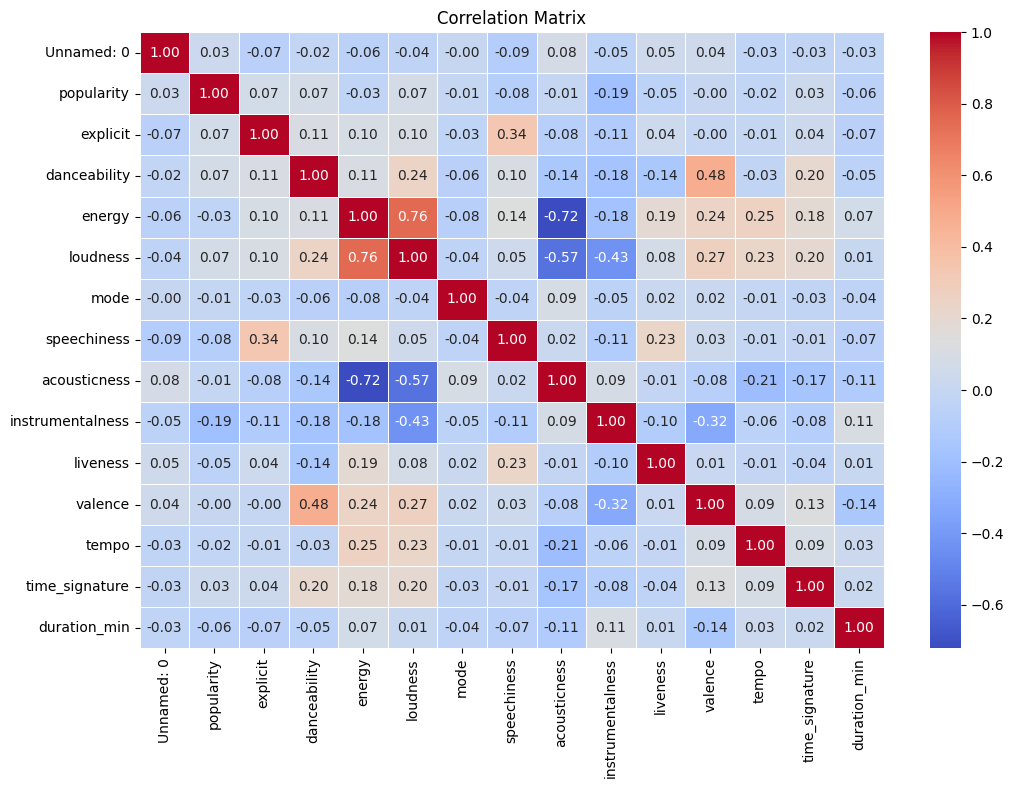

In [26]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

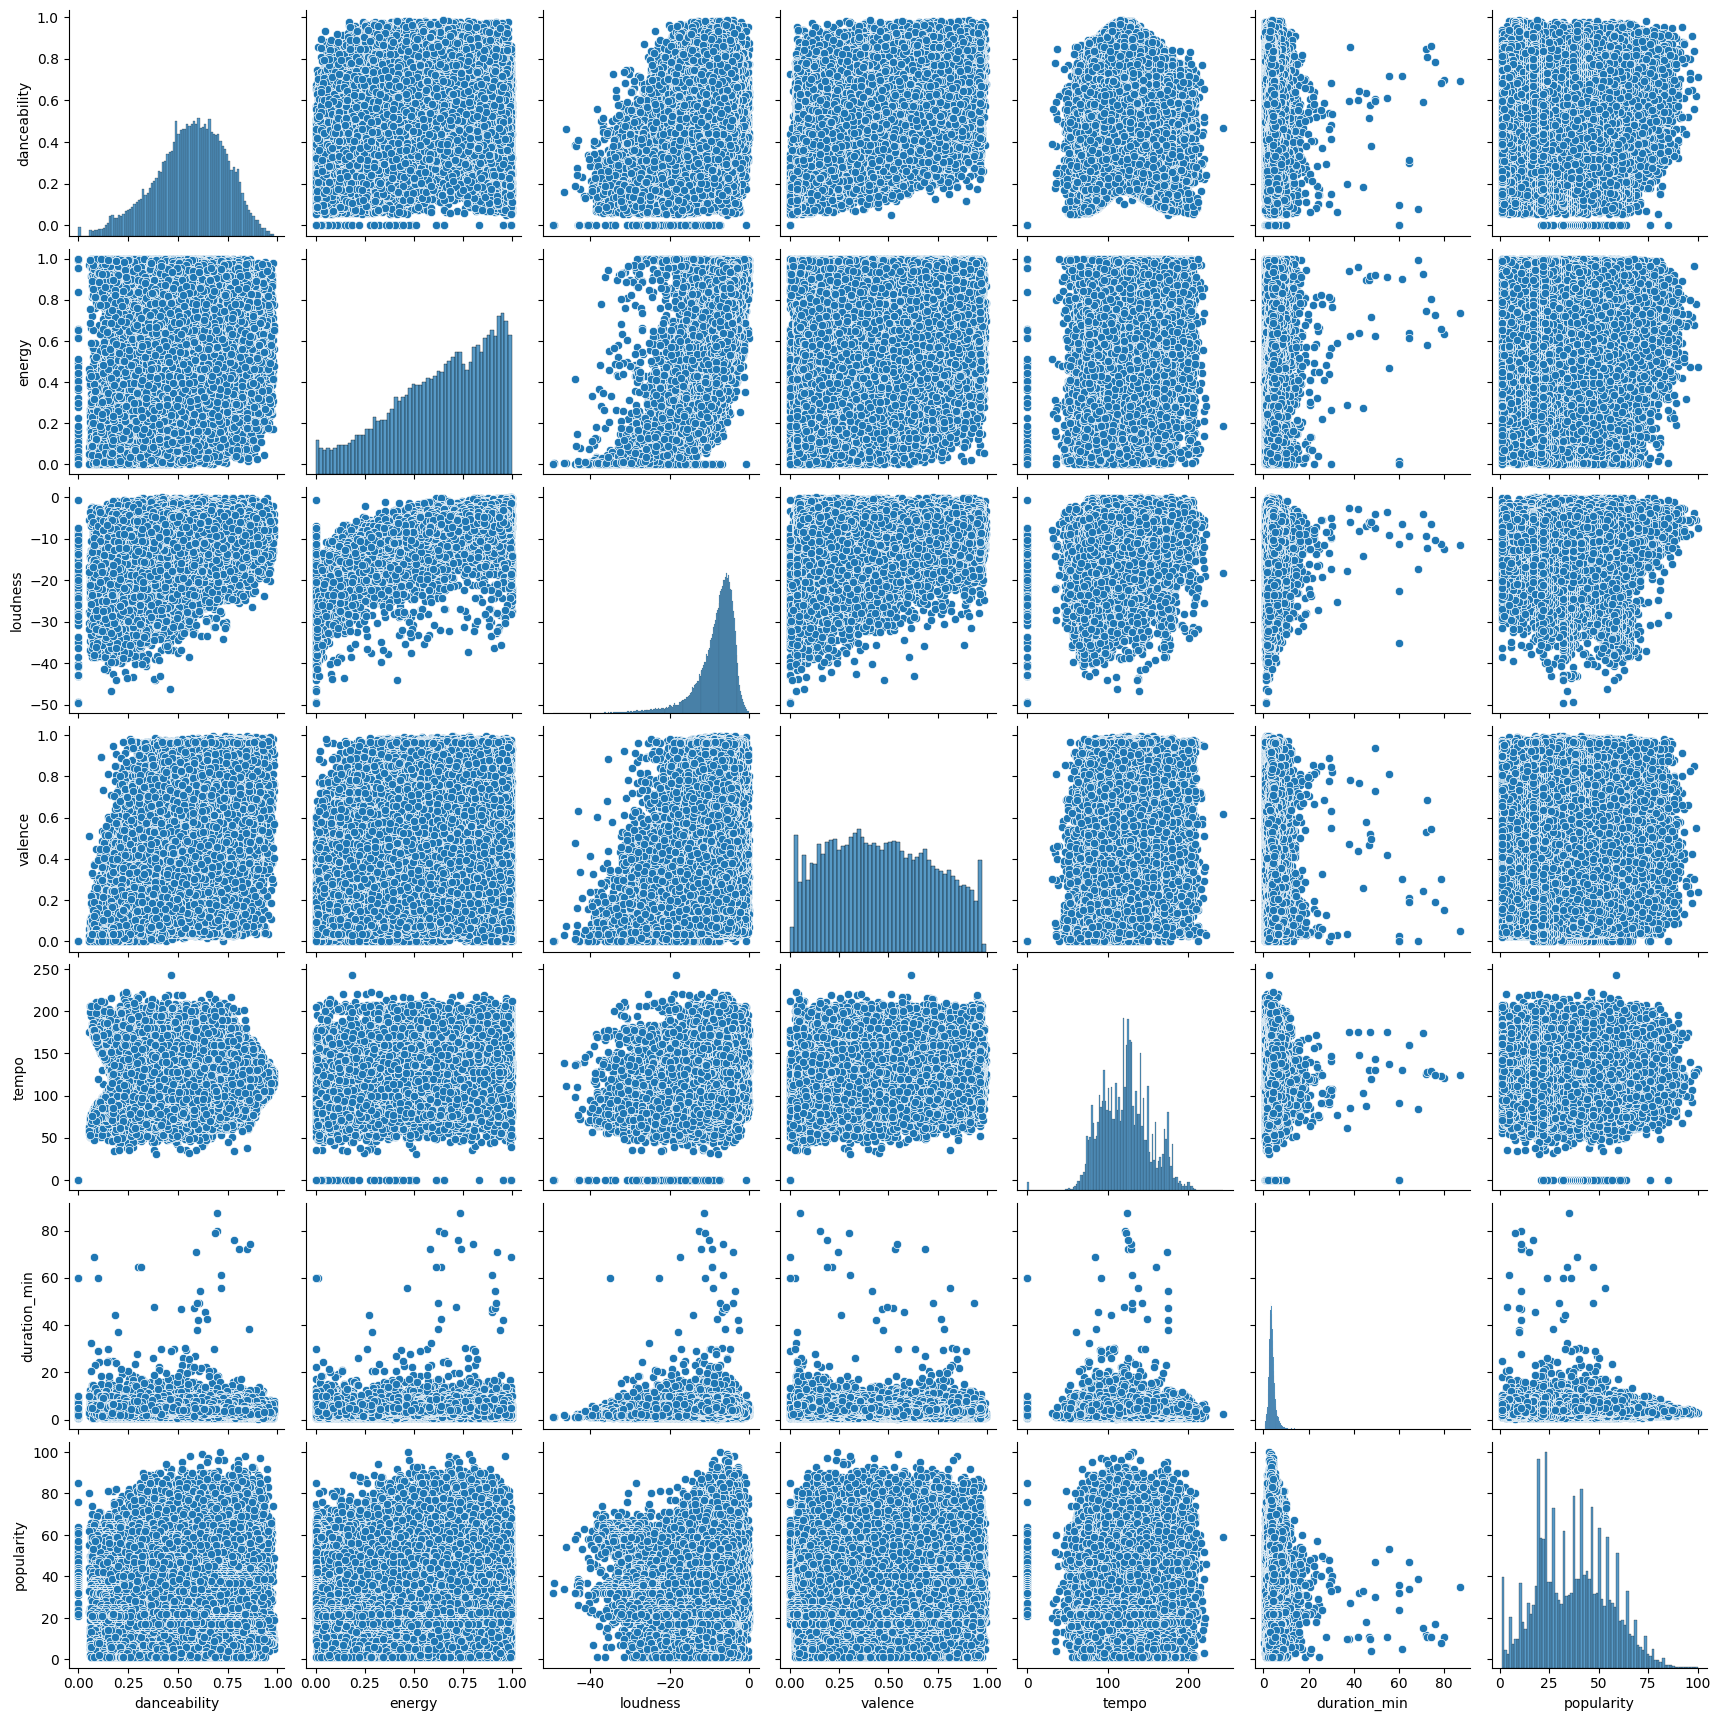

In [27]:
selected_columns = ["danceability", "energy", "loudness", "valence", "tempo", "duration_min", "popularity"]
sns.pairplot(df[selected_columns])
plt.show()

Text(0.5, 1.0, 'Popularidad de Canciones Explícitas vs No Explícitas')

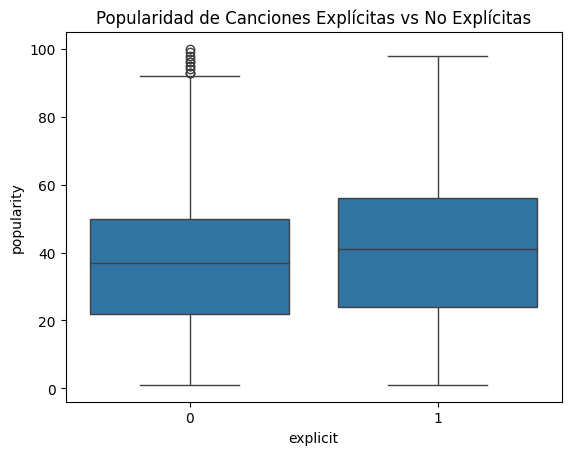

In [28]:
sns.boxplot(x='explicit', y='popularity', data=df)
plt.title('Popularidad de Canciones Explícitas vs No Explícitas')


/tmp/ipykernel_3271/1041782501.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="genre_category", y="popularity", palette="Set2")


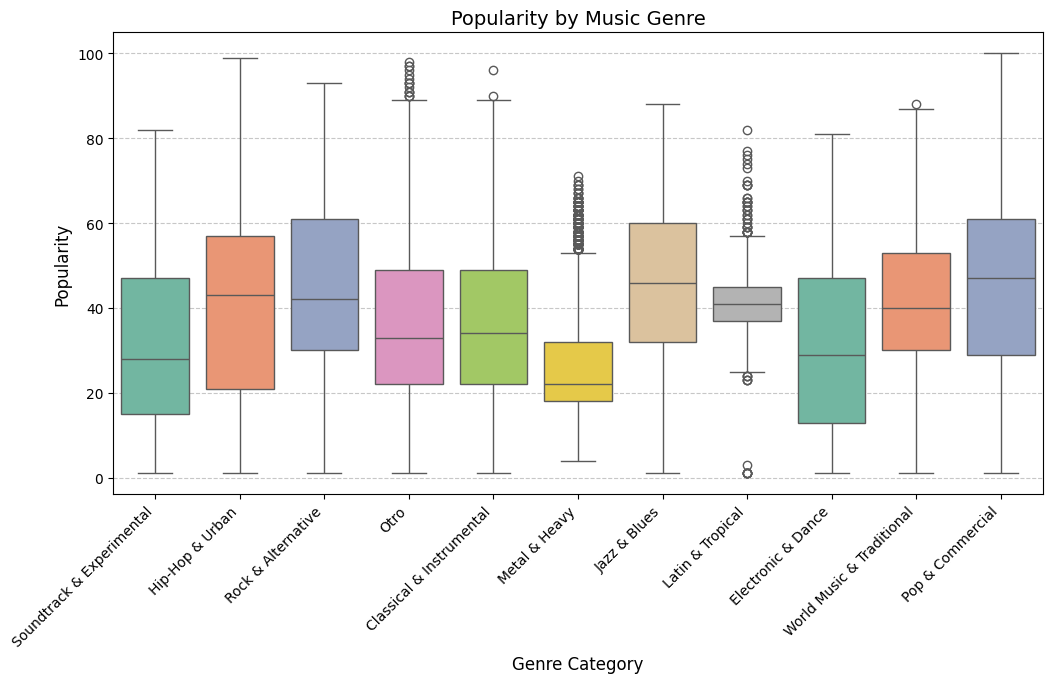

In [29]:
plt.figure(figsize=(12,6))  # Ajustar tamaño de la figura
sns.boxplot(data=df, x="genre_category", y="popularity", palette="Set2")  

plt.title("Popularity by Music Genre", fontsize=14)
plt.xlabel("Genre Category", fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.xticks(rotation=45, ha="right")  

plt.grid(axis="y", linestyle="--", alpha=0.7)  
plt.show()


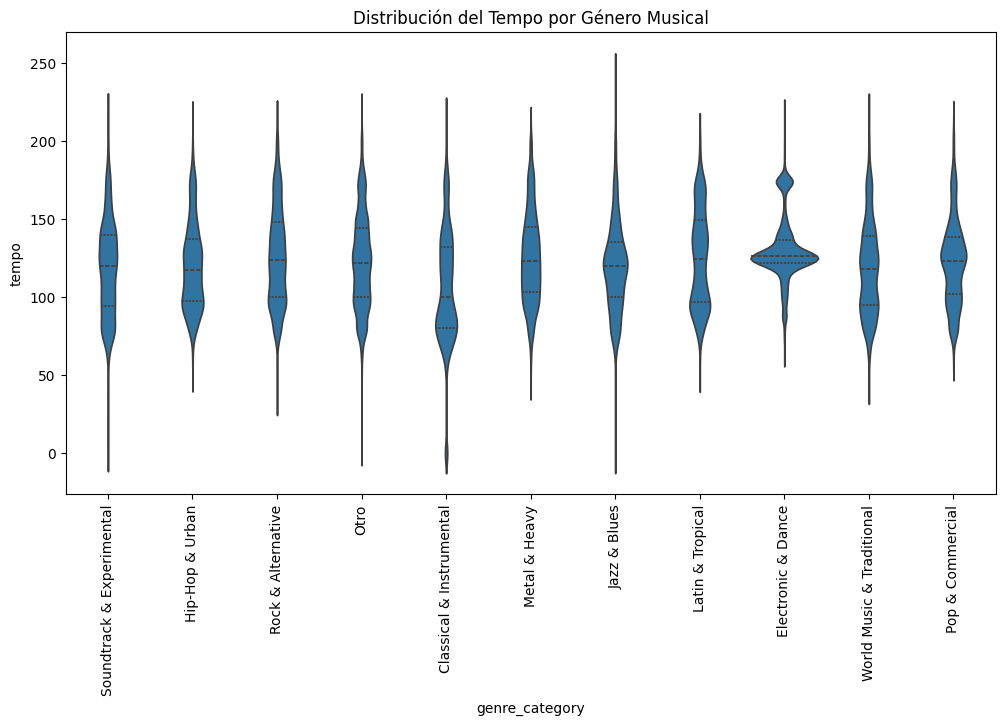

In [30]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="genre_category", y="tempo", inner="quartile")
plt.xticks(rotation=90)
plt.title("Distribución del Tempo por Género Musical")
plt.show()


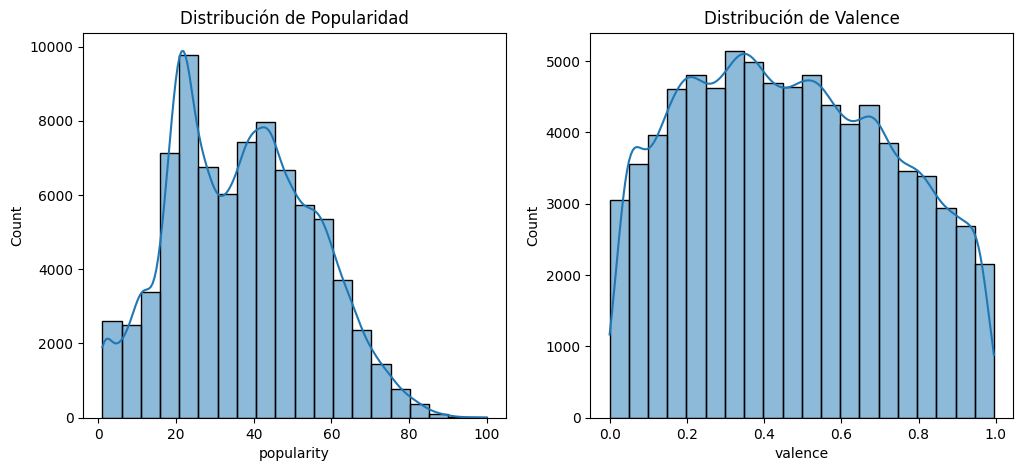

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["popularity"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribución de Popularidad")

sns.histplot(df["valence"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribución de Valence")

plt.show()


In [34]:
df["duration_min"] = df["duration_ms"] / 60000  
df.drop(columns=["duration_ms"], inplace=True)
df.head() 

KeyError: 'duration_ms'

In [35]:

def filter_instrumental_tracks(df: pd.DataFrame, 
                               instrumental_threshold: float = 0.85,
                               speechiness_threshold: float = 0.2) -> pd.DataFrame:
    """
    Filters out instrumental songs based on Spotify audio features.
    
    Args:
        df: DataFrame containing Spotify data
        instrumental_threshold: Values above this are considered instrumental
        speechiness_threshold: Values below this suggest low vocal presence
    
    Returns:
        DataFrame containing only tracks that likely have lyrics
    """
    # Combine conditions to detect instrumental tracks
    is_instrumental = (
        (df['instrumentalness'] > instrumental_threshold) |
        (df['speechiness'] < speechiness_threshold)
    )
    
  
    lyrical_songs = df[~is_instrumental].copy()
    
    df['has_lyrics'] = ~is_instrumental
    
    print(f"🔊 Removed {len(df) - len(lyrical_songs)} instrumental tracks")
    return lyrical_songs


In [36]:
df = filter_instrumental_tracks(df)

🔊 Removed 73079 instrumental tracks


In [38]:
df.shape
df.head(45)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,genre_category,energy_level
370,370,1wSZdWFZphxDh6iJhWlIUi,Ben Woodward,Don't Wanna Leave You,Don't Wanna Leave You,38,0,0.672,0.644,B,...,0.79500,0.000000,0.1460,0.549,148.135,4,acoustic,3.527867,Soundtrack & Experimental,Medium
692,692,5CU7ewecONNlWAJHu04HJQ,The Bridge City Sinners,Bridge City Sinners,Come on In,28,0,0.544,0.911,A,...,0.66100,0.000000,0.3440,0.851,114.776,4,acoustic,3.415433,Soundtrack & Experimental,High
768,768,1m3Lsbhkn6yL8apzsCiukd,Ben Woodward,Memories (Acoustic),Memories (Acoustic),46,0,0.802,0.183,G#,...,0.80900,0.000000,0.1090,0.664,91.078,4,acoustic,3.055617,Soundtrack & Experimental,Low
849,849,1VtzCELaY7snxB5vNXbAGg,Get Dead,Bad News,Welcome to Hell,26,0,0.474,0.843,F,...,0.02050,0.000003,0.0636,0.901,131.992,4,acoustic,2.648433,Soundtrack & Experimental,High
1000,1000,4pR4oQJULf7FDB54TleMyH,Limoblaze;Lecrae;Happi,Jireh (My Provider),Jireh (My Provider),64,0,0.443,0.778,C,...,0.24100,0.000000,0.2150,0.628,128.250,5,afrobeat,2.800000,Hip-Hop & Urban,High
1001,1001,4Ds4bq6aqOSAp1T7DikOi4,Criolo,Ainda Há Tempo,Ainda Há Tempo,44,0,0.580,0.800,F#,...,0.28100,0.000000,0.0708,0.483,81.303,4,afrobeat,5.306000,Hip-Hop & Urban,High
1006,1006,0tsjEf663ZNWGlIqY2c0Ms,Criolo;Rael,Ainda Há Tempo,Tô Pra Ver,41,0,0.637,0.818,G#,...,0.19000,0.000000,0.1020,0.599,90.571,4,afrobeat,4.242000,Hip-Hop & Urban,High
1009,1009,00LmM2QLGpfb5NC7PC7qqZ,Criolo,Ainda Há Tempo,Vasilhame,43,0,0.506,0.876,D,...,0.19400,0.000002,0.3530,0.676,124.218,5,afrobeat,2.874000,Hip-Hop & Urban,High
1010,1010,0pY5jjQucjJg3pqAbHhGkW,Criolo,Nó na Orelha,Sucrilhos,46,0,0.788,0.574,C,...,0.06260,0.000000,0.2030,0.764,160.027,4,afrobeat,4.003767,Hip-Hop & Urban,Medium
1011,1011,3ARDVYRmYJx1FrvR9Zlwp2,Criolo,Ainda Há Tempo,Chuva Ácida,39,0,0.708,0.782,A,...,0.05070,0.000000,0.2510,0.717,94.038,4,afrobeat,3.000000,Hip-Hop & Urban,High
